<a href="https://colab.research.google.com/github/csaybar/EarthEngineMasterGIS/blob/master/module03/01_wkt_geojson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--COURSE_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://user-images.githubusercontent.com/16768318/73986808-75b3ca00-4936-11ea-90f1-3a6c352766ce.png" width=10% >
<img align="right" style="padding-left:10px;" src="https://user-images.githubusercontent.com/16768318/73986811-764c6080-4936-11ea-9653-a3eacc47caed.png" width=10% >

**Bienvenidos!** Este *colab notebook* es parte del curso [**Introduccion a Google Earth Engine con Python**](https://github.com/csaybar/EarthEngineMasterGIS) desarrollado por el equipo [**MasterGIS**](https://www.mastergis.com/). Obten mas informacion del curso en este [**enlace**](https://www.mastergis.com/product/google-earth-engine/). El contenido del curso esta disponible en [**GitHub**](https://github.com/csaybar/EarthEngineMasterGIS) bajo licencia [**MIT**](https://opensource.org/licenses/MIT).

# **MASTERGIS: WKT y GEOJSON**

En esta lectura, aprenderemos sobre datos vectoriales y como se representan actualmente.

<img src="https://user-images.githubusercontent.com/16768318/72757228-517e8c00-3bc7-11ea-95ff-0869866a2ac7.png" width="35%">

### **1) Estructura de datos Espaciales**
#### **Raster**:
  - **matriz de celdas (pixeles) perfectamente estructurada.**
  - Eficiente para manejar datos continuos.
  - Analisis cuantitativo intuitivo (algebra de mapas).
  - Podria generar facilmente archivos enormes.
  - Mala calidad grafica


<img src="https://user-images.githubusercontent.com/16768318/72757314-8d195600-3bc7-11ea-96a0-8c5be305d998.png" width="35%">


#### **Vector**:
  - **Coordenadas, puntos, lineas y poligonos.**
  - Eficiente para manejar datos discretos.
  - Precision.
  - Reglas de topologia.
  - Datos continuos mal almacenados.


  <img src="https://user-images.githubusercontent.com/16768318/72757315-8d195600-3bc7-11ea-9343-a918353b7e22.png" width="35%">


### **2) Well-Known Text**

Well-known text (WKT) es un estandar definido por el Open Geospatial Consortium (OGC) y se describe en el [Simple Feature Access ISO](https://www.opengeospatial.org/standards/sfa) para representar geometrias. WKT tambien proporciona una representacion intuitiva del Sistema de Referencia de Coordenadas (CRS).
<center>
 <img src="https://user-images.githubusercontent.com/16768318/72758811-bb009980-3bcb-11ea-9285-7d9a21507ba6.png" width="50%">
</center>

#### **Estructuras de datos**

      1) POINT(0 0)
      2) LINESTRING(0 0, 1 1, 1 2)
      3) POLYGON((0 0, 4 0, 4 4, 0 4, 0 0), (1 1, 2 1, 2 2, 1 2, 1 1))
      4) MULTIPOINT((0 0), (1 2))

<center>
<img src="https://user-images.githubusercontent.com/16768318/72758812-bb009980-3bcb-11ea-95c8-39674b74f16e.png" width="50%">
</center>
<table><tr>
<img src="https://user-images.githubusercontent.com/16768318/72758813-bb009980-3bcb-11ea-9494-af912de1868d.png" width="50%">
<img src="https://user-images.githubusercontent.com/16768318/72758814-bb993000-3bcb-11ea-9ca4-4376ee3b128c.png" width="50%">
</tr></table>
 




### **3) Geopandas**

[GeoPandas](http://geopandas.org/) agrega estructura de datos espaciales a toda la funcionalidades de [Pandas](https://pandas.pydata.org/) y habilita operaciones espaciales en estos tipos, mediante [shapely](https://pypi.org/project/Shapely/). **GeoPandas** aprovecha **Pandas** junto con varios paquetes y practicas geoespaciales de codigo abierto para proporcionar un marco unico y conveniente para manejar datos de caracteristicas geoespaciales, operando en geometrias y atributos conjuntamente, y como con Pandas, eliminando en gran medida la necesidad de iterar sobre caracteristicas (filas). Tambien como con en Pandas, agrega un metodos para graficos y lectura/escritura de multiples formatos de archivos.

In [0]:
import geopandas as gpd

In [0]:
#@title Descarge los datos para la sesion
uri = 'https://github.com/r-spatial/sf/raw/master/inst/shape/nc'
shap = ['%s%s' % (uri,x) for x in ['.shp','.dbf','.prj','.shx']]
for x in shap:
  !wget {x}

In [0]:
!pip install geopandas

In [0]:
nc = gpd.read_file('/content/nc.shp')
nc.head(3)

,AREA,PERIMETER,CNTY_,CNTY_ID,NAME,FIPS,FIPSNO,CRESS_ID,BIR74,SID74,NWBIR74,BIR79,SID79,NWBIR79,geometry
0,0.114,1.442,1825.0,1825.0,Ashe,37009,37009.0,5,1091.0,1.0,10.0,1364.0,0.0,19.0,"POLYGON ((-81.47276 36.23436, -81.54084 36.272..."
1,0.061,1.231,1827.0,1827.0,Alleghany,37005,37005.0,3,487.0,0.0,10.0,542.0,3.0,12.0,"POLYGON ((-81.23989 36.36536, -81.24069 36.379..."
2,0.143,1.630,1828.0,1828.0,Surry,37171,37171.0,86,3188.0,5.0,208.0,3616.0,6.0,260.0,"POLYGON ((-80.45634 36.24256, -80.47639 36.254..."


In [0]:
nc['geometry']

0     POLYGON ((-81.47276 36.23436, -81.54084 36.272...
1     POLYGON ((-81.23989 36.36536, -81.24069 36.379...
2     POLYGON ((-80.45634 36.24256, -80.47639 36.254...
3     MULTIPOLYGON (((-76.00897 36.31960, -76.01735 ...
4     POLYGON ((-77.21767 36.24098, -77.23461 36.214...
                            ...                        
95    POLYGON ((-78.26150 34.39479, -78.32898 34.364...
96    POLYGON ((-78.02592 34.32877, -78.13024 34.364...
97    POLYGON ((-78.65572 33.94867, -79.07450 34.304...
98    POLYGON ((-77.96073 34.18924, -77.96587 34.242...
99    POLYGON ((-78.65572 33.94867, -78.63472 33.977...
Name: geometry, Length: 100, dtype: geometry

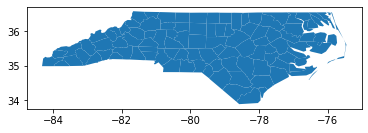

In [0]:
nc.plot()

In [0]:
nc.to_file('nc_up.shp')

### **4) GeoJSON** 

http://geojson.io/

GeoJSON surgio como una convencion de la comunidad aprovechando la ubicuidad de la codificacion JSON, especialmente en la web. Al ser JSON, pueden ser facilmente tratados en python (diccionarios).

<center>
<h3>FeatureCollection  --> Feature --> Geometry --> Coordinates</h3>
</center>

GeoJSON Ejemplo:

In [0]:
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [102.0, 0.5]
      },
      "properties": {
        "prop0": "value0",
        "prop1": 0
      }
    },
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [-90.0, 10.5]
      },
      "properties": {
        "prop0": "value3",
        "prop1": 3
      }
    }
  ]
}

{'features': [{'geometry': {'coordinates': [102.0, 0.5], 'type': 'Point'},
   'properties': {'prop0': 'value0', 'prop1': 0},
   'type': 'Feature'},
  {'geometry': {'coordinates': [-90.0, 10.5], 'type': 'Point'},
   'properties': {'prop0': 'value3', 'prop1': 3},
   'type': 'Feature'}],
 'type': 'FeatureCollection'}

### **5) De geopandas a GeoJSON** 

In [0]:
nc.__geo_interface__

### **6) Subida de datos raster y vector a GEE**
Puedes subir datos vectoriales (SHAPEFILE) y raster (GeoTIFF).

<center>
<h2>
<a href="https://code.earthengine.google.com/">https://code.earthengine.google.com/</a>
</h2>
</center>
<center>
<img src='https://user-images.githubusercontent.com/16768318/72866846-abb94300-3cd4-11ea-819e-f5a18ef724b1.gif' width="75%">
</center>

### **¿Dudas con este Jupyer-Notebook?**

Estaremos felices de ayudarte!. Create una cuenta Github si es que no la tienes, luego detalla tu problema ampliamente en: https://github.com/csaybar/EarthEngineMasterGIS/issues

**Tienes que dar clic en el boton verde!**

<center>
<img src="https://user-images.githubusercontent.com/16768318/79680748-d5511000-81d8-11ea-9f89-44bd010adf69.png" width = 70%>
</center>